# Working with Time Series Data

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from vega_datasets import data
df = data.sf_temps()
df

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


## <font color = 'red'>1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
# make date column index and sort ascending
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00
...,...
2010-12-31 19:00:00,50.40
2010-12-31 20:00:00,49.90
2010-12-31 21:00:00,49.40


In [186]:
# resample df based on the average temp per day
df_daily_mean = df.resample('D').mean()
df_daily_mean

,delay,distance
date,,
2001-01-01,5.80,567.73
2001-01-02,20.15,491.51
2001-01-03,15.26,488.99
2001-01-04,3.81,496.60
2001-01-05,6.07,484.55
...,...,...
2001-03-27,0.68,515.87
2001-03-28,0.10,496.91
2001-03-29,10.88,545.27


<function matplotlib.pyplot.legend(*args, **kwargs)>

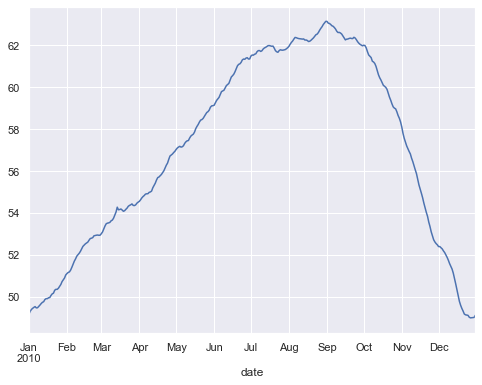

In [6]:
# plot the daily average temp
df_daily_mean.temp.plot(label = 'daily_temp_averages')
plt.legend

## <font color = 'red'>2. Write the code necessary to visualize the minimum temperature over time.

In [8]:
df_daily_min = df.resample('D').min()
df_daily_min

,temp
date,
2010-01-01,45.80
2010-01-02,46.00
2010-01-03,46.10
2010-01-04,46.10
2010-01-05,46.10
...,...
2010-12-27,45.60
2010-12-28,45.60
2010-12-29,45.60


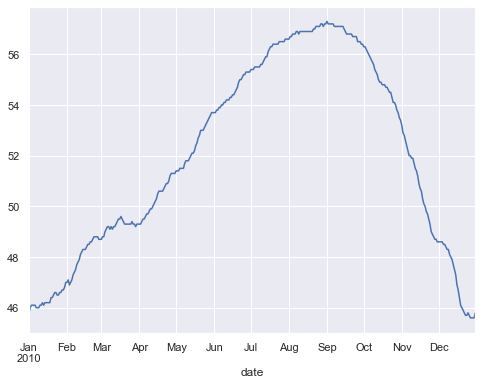

In [12]:
df_daily_min.temp.plot(label = 'daily min temp')
plt.legend
plt.show()

## <font color = 'red'>3. Write the code necessary to visualize the maximum temperature over time.

In [13]:
df.resample('D').max()

,temp
date,
2010-01-01,53.30
2010-01-02,53.40
2010-01-03,53.50
2010-01-04,53.60
2010-01-05,53.80
...,...
2010-12-27,53.20
2010-12-28,53.20
2010-12-29,53.20


<AxesSubplot:xlabel='date'>

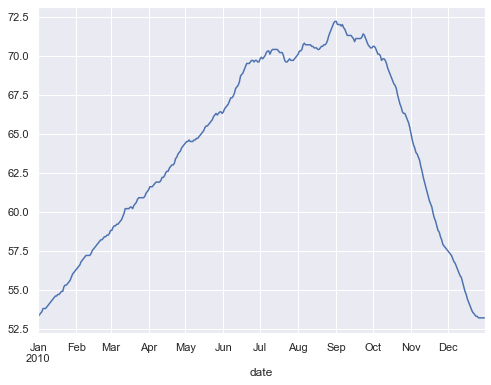

In [14]:
df.resample('D').max().temp.plot(label='daily max temp')

## <font color = 'red'>4. Which month is the coldest, on average?

In [27]:
# Set resample to monthly and get mean temp per month
df_monthly_mean_temp = df.resample('M').mean()
df_monthly_mean_temp

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


In [37]:
# find the month with the lowest average temperature
df_monthly_mean_temp[df_monthly_mean_temp.temp == df_monthly_mean_temp.temp.min()]

,temp
date,
2010-01-31,49.98


## <font color = 'red'>5. Which month has the highest average temperature?

In [43]:
# find the month with the highest average temp
df_monthly_mean_temp[df_monthly_mean_temp.temp == df_monthly_mean_temp.temp.max()]

,temp
date,
2010-09-30,62.49


## <font color = 'red'>6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [187]:
# resample df by day and get min max vaue for each day
df_min_max = df.temp.resample('D').agg(['min','max'])
df_min_max

AttributeError: 'DataFrame' object has no attribute 'temp'

## <font color = 'red'>7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

# <font color = 'red'>2nd Set of Exercises

## <font color = 'red'>Use the dataset to answer the following questions:

In [98]:
from vega_datasets import data
df = data.seattle_weather()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


In [102]:
df = df.set_index('date').sort_index()
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...
2015-12-27,8.60,4.40,1.70,2.90,fog
2015-12-28,1.50,5.00,1.70,1.30,fog
2015-12-29,0.00,7.20,0.60,2.60,fog


## <font color = 'red'> 1. Which year and month combination has the highest amount of precipitation?

In [112]:
# set resample for monthly mean
monthly_mean = df.resample('M').mean()
monthly_mean.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,5.59,7.05,1.54,3.90
2012-02-29,3.18,9.28,3.20,3.90
2012-03-31,5.90,9.55,2.84,4.25
2012-04-30,2.27,14.87,5.99,3.37
2012-05-31,1.68,17.66,8.19,3.35


In [118]:
# find max monthly mean precipitation
monthly_mean[monthly_mean.precipitation == monthly_mean.precipitation.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.18,8.38,3.83,4.34


### December in 2015 has the highest average precipitation

In [122]:
# set resample of yearly mean
yearly_mean = monthly_mean.resample('Y').mean()
yearly_mean

,precipitation,temp_max,temp_min,wind
date,,,,
2012-12-31,3.34,15.26,7.28,3.40
2013-12-31,2.28,16.02,8.14,3.02
2014-12-31,3.39,16.93,8.62,3.40
2015-12-31,3.13,17.39,8.81,3.16


In [124]:
# find year with max precipitation
yearly_mean[yearly_mean.precipitation == yearly_mean.precipitation.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2014-12-31,3.39,16.93,8.62,3.40


### 2014 has the highest average precipitation

## <font color = 'red'> 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

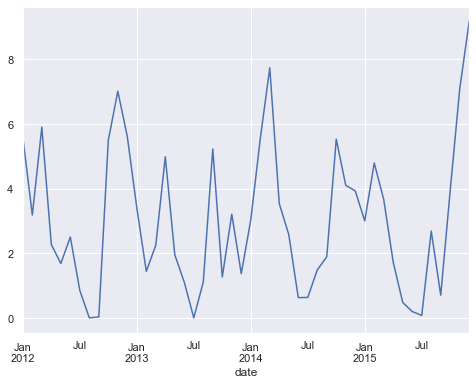

In [125]:
monthly_mean.precipitation.plot() 

## <font color = 'red'> 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

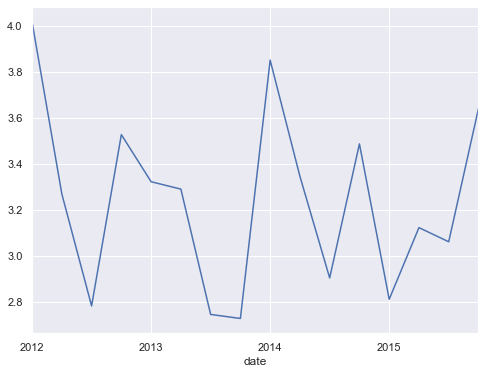

In [132]:
monthly_mean.wind.resample("Q").mean().plot()

## <font color = 'red'> 4. Which year-month combination is the windiest?

In [136]:
monthly_mean[monthly_mean.wind == monthly_mean.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.54,8.20,2.64,4.53


### Feb 2014 had the highest wind

In [147]:
yearly_mean = monthly_mean.resample('Y').mean()
yearly_mean

,precipitation,temp_max,temp_min,wind
date,,,,
2012-12-31,3.34,15.26,7.28,3.40
2013-12-31,2.28,16.02,8.14,3.02
2014-12-31,3.39,16.93,8.62,3.40
2015-12-31,3.13,17.39,8.81,3.16


In [148]:
yearly_mean[yearly_mean.wind == yearly_mean.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2012-12-31,3.34,15.26,7.28,3.40


### 2012 had the highest wind

## <font color = 'red'> 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [158]:
df_sun = df[df.weather=='sun']
df_sun

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.00,10.00,2.80,2.00,sun
2012-01-11,0.00,6.10,-1.10,5.10,sun
2012-01-12,0.00,6.10,-1.70,1.90,sun
2012-01-13,0.00,5.00,-2.80,1.30,sun
2012-02-02,0.00,8.30,1.70,2.60,sun
...,...,...,...,...,...
2015-12-13,1.30,7.80,6.10,6.10,sun
2015-12-14,0.00,7.80,1.70,1.70,sun
2015-12-26,0.00,4.40,0.00,2.50,sun


In [166]:
df_sun_yearly_count = df_sun.resample('Y').count()
df_sun_yearly_count

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


In [168]:
df_sun_yearly_count[df_sun_yearly_count.weather == df_sun_yearly_count.weather.max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-12-31,211,211,211,211,211


### 2014 had the most sun

## <font color = 'red'> 6. In which month does it rain the most?

In [174]:
df.resample('M').sum()[df.resample('M').sum().precipitation == df.resample('M').sum().precipitation.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


### December has the most rain

## <font color = 'red'> 7. Which month has the most number of days with a non-zero amount of precipitation?

In [176]:
df = data.flights_20k()
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [179]:
df = df.set_index('date').sort_index()
df

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


- Convert any negative delays to 0

In [182]:
def delay():
    if n < 0:
        n = 0

In [183]:
for row in dft.delay:
    if dft.delay < 0:
        dft.delay == 0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

- Which hour of the day has the highest average delay?

- Does the day of the week make a difference in the delay amount?

- Does the month make a difference in the delay amount?

## <font color = 'red'> Bonus

- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total

- Use the sf_temps dataset
- Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
- How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
- Create pretty labels for time plots
- bVisualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

## <font color = 'red'>Explore the birdstrikes dataset.

In [ ]:
df = data.birdstrikes()